In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual
from putils import *

# Ecuacion diferencial lineal. Ley de enfriamiento de Newton

En este caso la variable $x$ es la temperatura del objeto y R es su tasa de intercambio de calor (que depende del calor especifico y el area de contacto). $x_0$ es la temperatura ambiente.
La evolucion de la temperatura esta dada por 

$\dot{x} = -R(x-x_0)$

In [3]:
#definimos la ed
def newton(t, x, R, x0):
    return[
        -R*(x-x0)
    ]

In [4]:
# definimos una funcion para resolver la ecuacion diferencial
def solve_newton(R,x0,xini,tmax):
    dt = 0.1
    par={'R':R,'x0':x0}
    return solve_plot(newton,par,[xini],tmax,dt)

## Calculo de las trayectorias
Para resolver (integrar) usamos la funcion **solve_plot** de putils

**solve_plot** necesita como argumentos:
1. la funcion que define el sistema dinamico (en este caso newton)
2. los parametros del sistema como un diccionario 'nombre':valor
3. la condicion inicial como un array de un unico valor [xini] en nuestro caso
4. el tiempo maximo
5. (opcional) el paso de integracion

Para facilitar esto definimos una funcion ad-hoc que despues vamos a poder hacer interactiva

## Evolucion temporal y Retrato de fases
Podemos graficar la solucion del sistema y el retrato de fases para un valor particular del parametro y de la condicion inicial

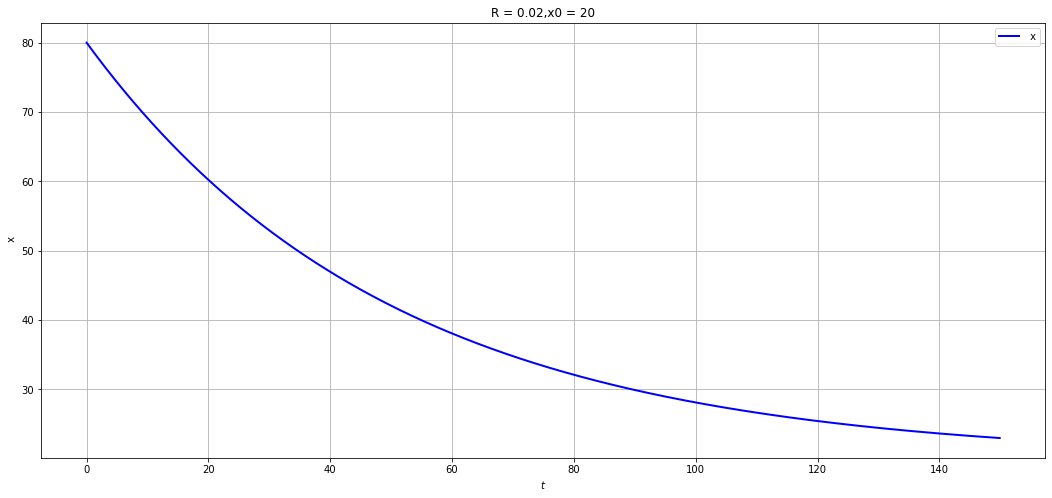

In [5]:
solve_newton(0.02,20,80,150)

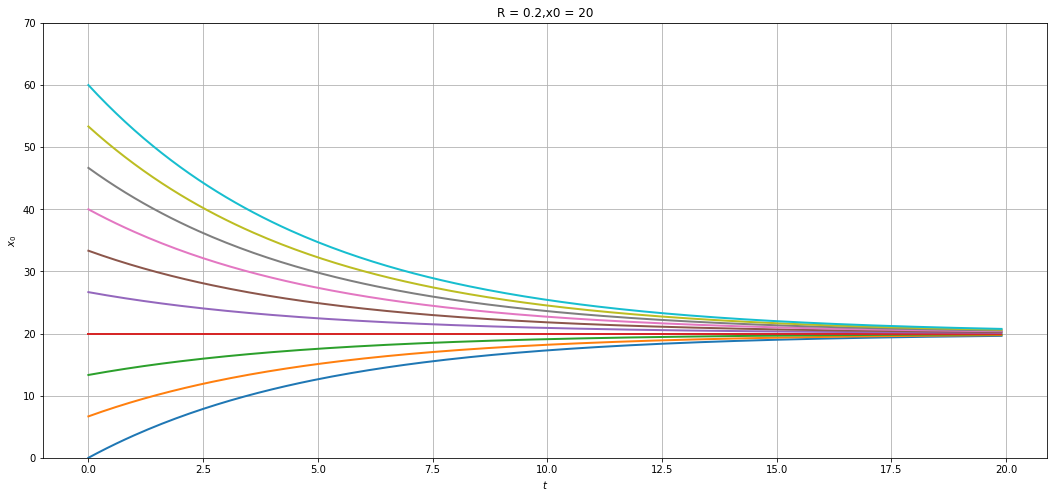

In [6]:
# multiples trayectorias
xini_array = np.linspace(0,60,10)
dt = 0.1
tmax = 20
pars={'R':0.2,'x0':20}
solve_plot1D_multiple(newton,pars,xini_array,tmax,dt,xrange=[0,70])

## Interaccion
usando el ipywidget interactive podemos darle un rango al parametro, la condicion incial y el tiempo maximo de integracion y jugar con eso de forma interactiva 

In [7]:
iplot0 = interactive(solve_newton,
                    R=(0,1.0,0.01),
                    x0=(0,30,0.01), 
                    xini=(0,100,0.001),
                    tmax=(1,30,1))

iplot0

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=15.0, des…

# Ecuacion Logistica
Sistema mas simple que modela el crecimiento de una poblacion con capacidad K y tasa de crecimiento R

Ecuacion diferencial de primer orden, x corresponde a la poblacion normalizada por la capacidad K y R a la tasa de crecimiento. Ambos son parametros positivos.

$ \dot{x} = Rx(1-x/K) $ 

Esta ecuacion presenta dos puntos fijos. Uno en $x=0$ que es siempre inestable. En su vecindad, para una peque\~na poblacion positiva se presenta un crecimiento expopencial con tasa R ya que 1 es mucho mayor que $x/K$.

El otro punto fijo es $x=K$ y es siempre estable y representa la poblacion maxima que alcanza el crecimiento. Este sistema no presenta bifurcaciones.

In [8]:
# Ecuacion Logistica
def logistic(t, x, R, K):
    return [
        R*x*(1-x/K),
    ]

In [9]:
# definimos una funcion para resolver logistic
def solve_logistic(R,K,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K}
    return solve_plot(logistic,par,[xini],tmax,dt)

iplot0 = interactive(solve_logistic,
                    R=(0,2.0,0.01),
                    K=(0,3.0,0.01), 
                    xini=(0,2,0.001),
                    tmax=(1,30,1))

iplot0

interactive(children=(FloatSlider(value=1.0, description='R', max=2.0, step=0.01), FloatSlider(value=1.5, desc…

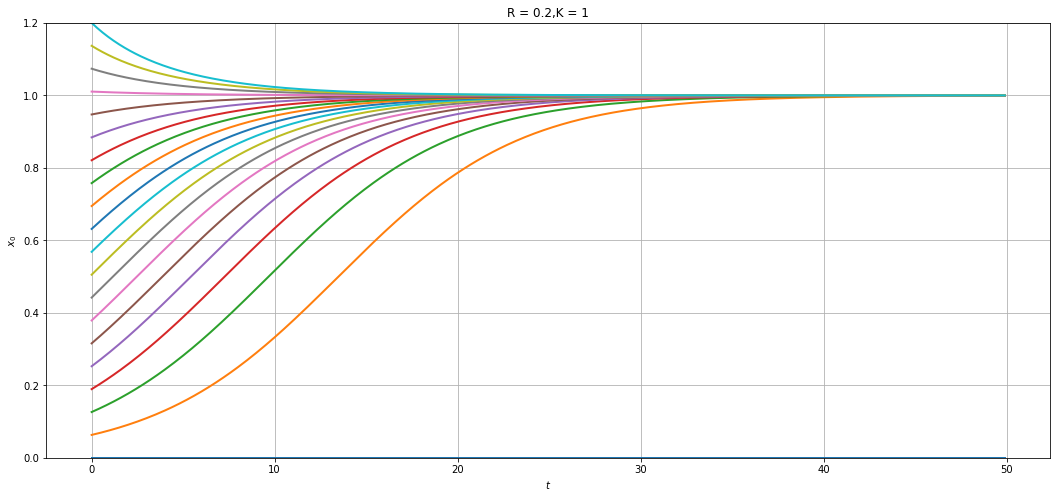

In [10]:
# multiples trayectorias
xini_array = np.linspace(0,1.2,20)
dt = 0.1
tmax = 50
pars={'R':0.2,'K':1}
solve_plot1D_multiple(logistic,pars,xini_array,tmax,dt,xrange=[0,1.2])

## Evolucion temporal y f(x)
solve_plot1D_dual grafica ademas de la evolucion temporal la funcion $f(x)$ para poder visualizar los puntos fijos y el flujo

Podemos ver que $f(x)$ es una parabola invertida que corta el eje horizontal siempre en los puntos fijos $x=0 y $x=K$

In [11]:
def solve_dual_logistic(R,K,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K}
    return solve_plot1D_dual(logistic,par,[xini],tmax,dt,xrange=[0,1])

iplot1 = interactive(solve_dual_logistic,
                    R=(0,2.0,0.01),
                    K=(0,1.0,0.01), 
                    xini=(0,1,0.001),
                    tmax=(1,30,1))

iplot1

interactive(children=(FloatSlider(value=1.0, description='R', max=2.0, step=0.01), FloatSlider(value=0.5, desc…

# Ecuacion Logistica con Harvest

En su version mas simple se agrega un termino de decrecimiento constante que representa el harvest (cosecha, caza, pesca)

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - H$ 

Atencion: no es un modelo realista para una poblacion porque me puede dar un valor de x negativo.

El efecto de agregar el termino constante es el de correr los puntos fijos en $0$ y $K$ a los nuevos valores:

$x_* = K/2 \left( 1 \pm \sqrt{1-4H/KR} \right) $

In [12]:
# Ecuacion Logistica con harvest
def logistic_harvest1(t, x, R, K,H):
    return [
        R*x*(1-x/K)-H,
    ]

In [13]:
def solve_dual_logistic_harvest1(R,K,H,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K,'H':H}
    return solve_plot1D_dual(logistic_harvest1,par,[xini],tmax,dt,xrange=[0,1])

iplot2 = interactive(solve_dual_logistic_harvest1,
                    R=(0,1.0,0.01),
                    K=(0,1.0,0.01), 
                    H=(0,0.25,0.01), 
                    xini=(0,1,0.01),
                    tmax=(1,50,1))
iplot2

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=0.5, desc…

Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.


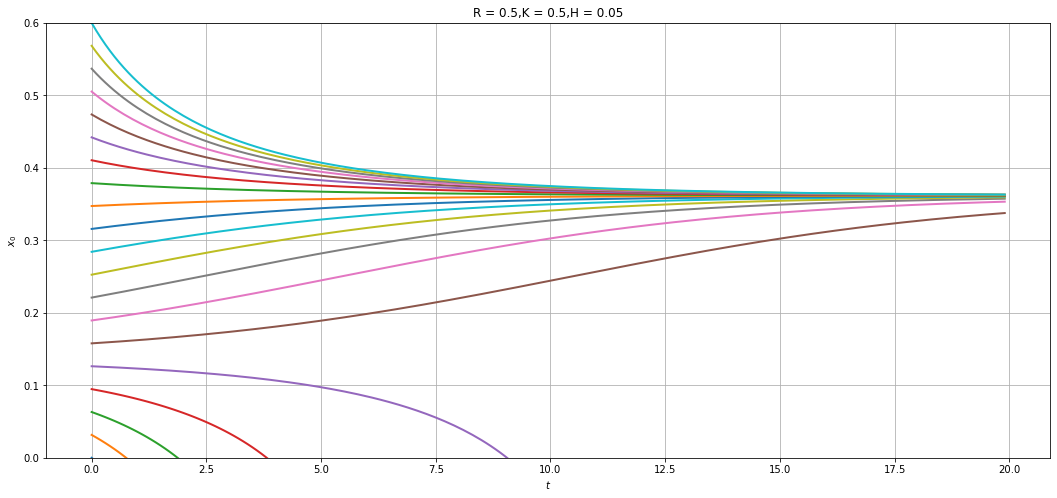

In [14]:
import importlib as imp
import putils
imp.reload(putils)
from putils import *

# multiples trayectorias
xini_array = np.linspace(0,0.6,20)
dt = 0.1
tmax = 20
pars={'R':0.5,'K':0.5,'H':0.05}
solve_plot1D_multiple(logistic_harvest1,pars,xini_array,tmax,dt,xrange=[0,0.6])

## Diagrama de Bifurcaciones. Bifurcacion Nodo-Silla

Se produce una Bifurcacion de Nodo Silla (SN Saddle-Node) cuando colapsan los dos puntos fijos, esto es cuando la raiz de la expresion de los puntos fijos se hace 0, es decir cuando 
$H = KR/4$

0.05
0.05068421052631579
0.051368421052631584
0.05205263157894737
0.05273684210526316
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.05342105263157895
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.05410526315789474
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.05478947368421053
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.055473684210526314
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.05615789473684211
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.056842105263157895
Required step size is less than spacing between numbers.
Required step size is less than spacing between num

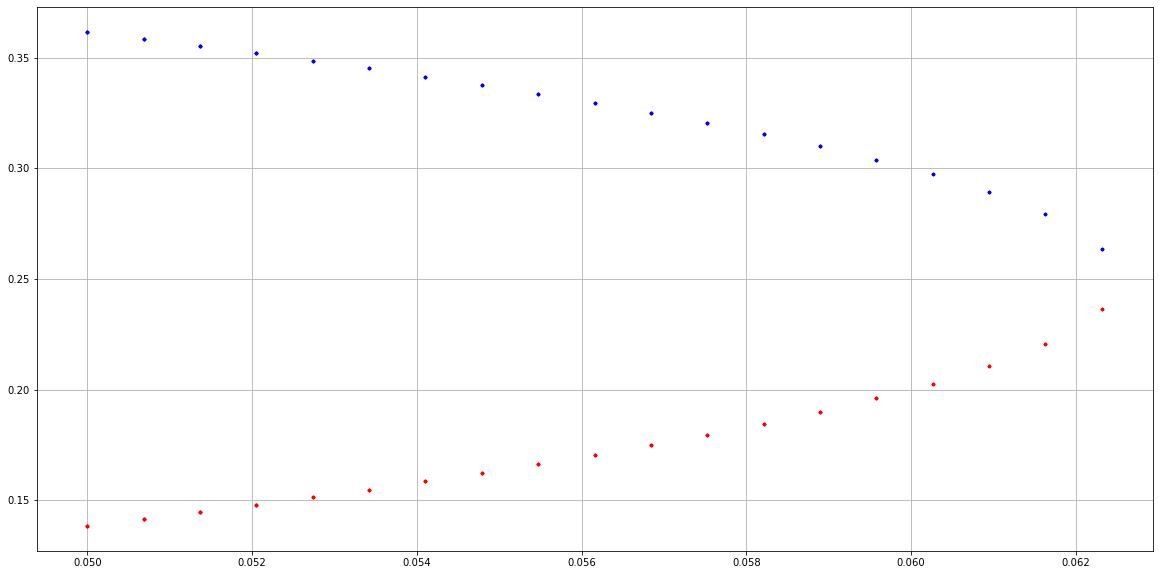

In [15]:
dt = 0.1
pars={'R':0.5,'K':0.5,'H':0.04}
tmax = 500
xini = [[0.15+0.05*n] for n in range(5)]
hvals = np.linspace(0.05,0.063,20)
bifurcation_diag(logistic_harvest1, pars, xini, tmax, dt, 'H', hvals, xrange=[0,1]);

# Version con Harvest mas realista

Ahora el Harvest no es constante sino que depende de la poblacion 

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Hx\frac{1}{1+x}$ 

Este sistema va a tener siempre un punto fijo en $x=0$ y puede tener otros dos como solucion de la ecuacion cuadratica:

$x^2-(K-1)x+KH/R-K=0$

Estos puntos fijos van a ser uno estable y otro inestable (se originan en una bifurcacion SN) pero solo van a estar en el eje positivo cuando $K>1$

In [26]:
# Ecuacion Logistica con harvest realista
def logistic_harvest2(t, x, R, K,H):
    return [
        R*x*(1-x/K)-H*x/(1+x),
    ]

In [21]:
def solve_logistic_harvest2(R,K,H,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K,'H':H}
    return solve_plot(logistic_harvest2,par,[xini],tmax,dt)

# probar H = 0.54
iplot3 = interactive(solve_logistic_harvest2,
                    R=(0,1.0,0.01),
                    K=(0,4.0,0.01), 
                    H=(0,2,0.01), 
                    xini=(0,1,0.01),
                    tmax=(1,200,1))

iplot3

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=2.0, desc…

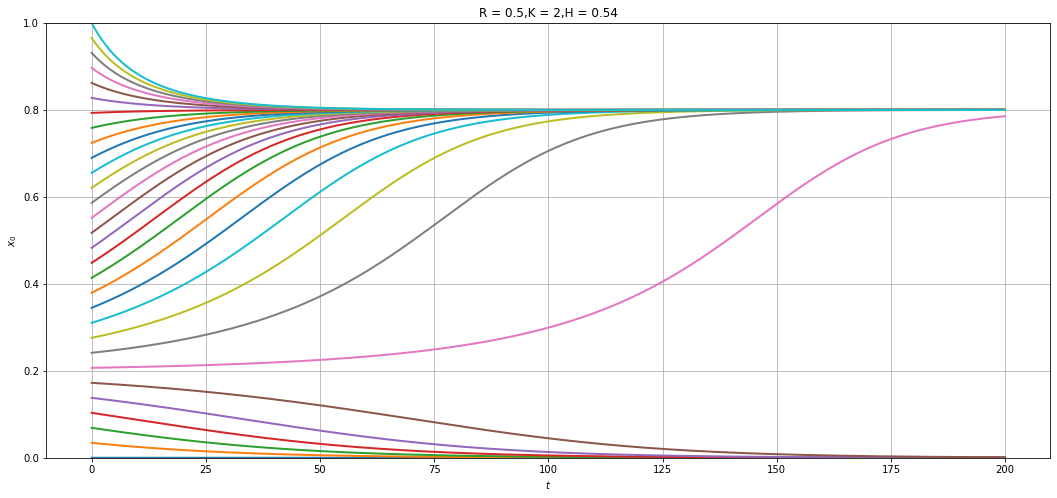

In [23]:
# multiples trayectorias
xini_array = np.linspace(0,1,30)
dt = 0.1
tmax = 200
pars={'R':0.5,'K':2,'H':0.54}
solve_plot1D_multiple(logistic_harvest2,pars,xini_array,tmax,dt,xrange=[0,1])

In [24]:
def solve_dual_logistic_harvest2(R,K,H,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K,'H':H}
    return solve_plot1D_dual(logistic_harvest2,par,[xini],tmax,dt,xrange=[0,1])

iplot4 = interactive(solve_dual_logistic_harvest2,
                    R=(0,1.0,0.01),
                    K=(0,4.0,0.01), 
                    H=(0,2,0.01), 
                    xini=(0,1,0.01),
                    tmax=(1,200,1))

iplot4

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=2.0, desc…

## Diagrama de bifurcaciones

En este caso tambien tenemos una bifurcacion de nodo silla pero en los dos puntos fijos que no son cero.

Estos puntos fijos pueden calcularse a partir de la ecuacion cuadratica como 

$x_* = \frac{K-1}{2} \pm \sqrt{\left(\frac{K-1}{2}\right)^2-\frac{KH}{R}}$

y van a colapsar cuando la raiz cuadrada sea cero es decir cuando 

$H = \frac{R}{K}\left(\frac{K-1}{2}\right)^2$

La bifurcacion se produce para ese valor de $H$ y en la coordenada $x=(K-1)/2$

0.52
0.5226315789473684
0.5252631578947369
0.5278947368421053
0.5305263157894737
0.533157894736842
0.5357894736842105
0.5384210526315789
0.5410526315789473
0.5436842105263158
0.5463157894736842
0.5489473684210526
0.5515789473684211
0.5542105263157895
0.5568421052631578
0.5594736842105262
0.5621052631578947
Required step size is less than spacing between numbers.
0.5647368421052631
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.5673684210526315
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less 

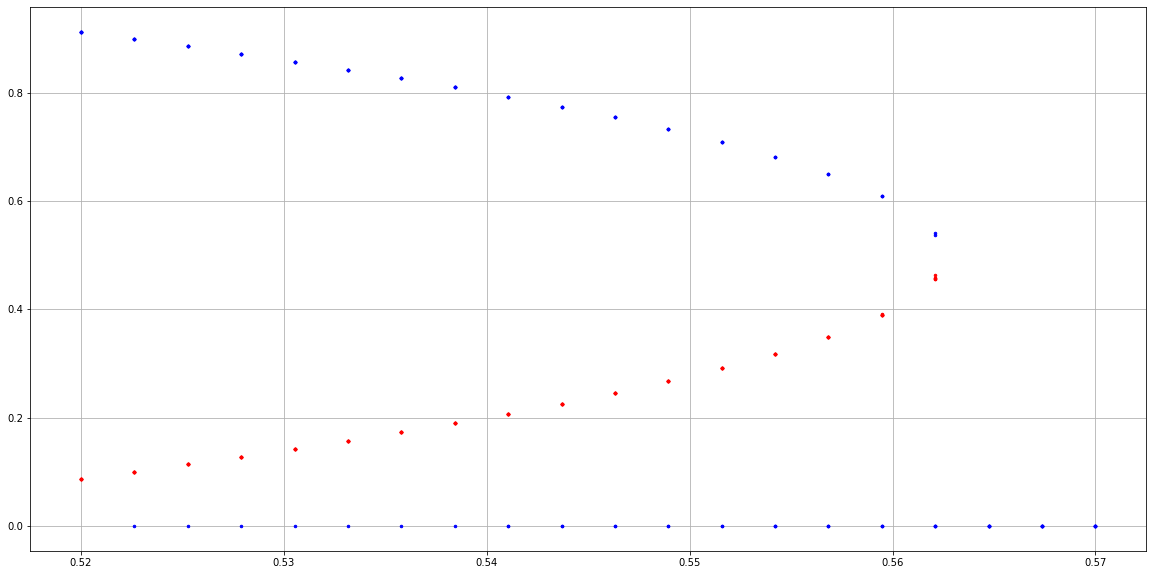

In [25]:
dt = 0.1
pars={'R':0.5,'K':2,'H':0.54}
tmax = 500
xini = np.linspace(0,0.6,7)
hvals = np.linspace(0.52,0.57,20)
bifurcation_diag(logistic_harvest2, pars, xini, tmax, dt, 'H', hvals, xrange=[0,1]);

# Ecuacion del consumidor

Una ecuacion que aparece en la macroeconomia es un modelo super simplificado de consumo de un recurso renovable conocida como ecuacion del consumidor que no es mas que la ecuacion logistica con un termino de cosecha o consumo que es directamente proporcional a la abundancia del recurso $px$. Si bien es una ecuacion mas simple que la anterior presenta otra bifurcacion que no es de nodo silla

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Px$ 

En este caso los puntos fijos son siempre dos. Uno esta siempre en $x=0$ pero cambia de estabilidad cuando $P=R$ y el otro esta en:

$x_* = \frac{K(R-P)}{R}$

In [28]:
# Ecuacion del consumidor
def consumer(t, x, R, K, P):
    return [
        R*x*(1-x/K)-P*x,
    ]

In [29]:
def solve_consumer(R,K,P,xini,tmax):
    dt = 0.2
    par={'R':R,'K':K,'P':P}
    return solve_plot(consumer,par,[xini],tmax,dt)

iplot4 = interactive(solve_consumer,
                    R=(0,1.0,0.01),
                    K=(0,4.0,0.01), 
                    P=(0,2,0.01), 
                    xini=(0,1,0.01),
                    tmax=(1,200,1))

iplot4

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=2.0, desc…

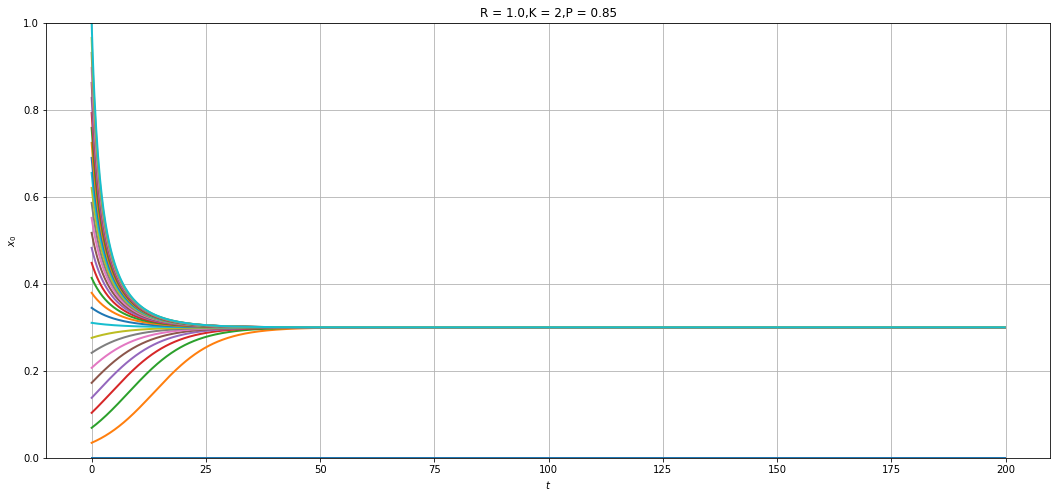

In [30]:
# multiples trayectorias
xini_array = np.linspace(0,1,30)
dt = 0.2
tmax = 200
pars={'R':1.0,'K':2,'P':0.85}
solve_plot1D_multiple(consumer,pars,xini_array,tmax,dt,xrange=[0,1])

In [34]:
def solve_dual_consumer(R,K,P,xini,tmax):
    dt = 0.1
    par={'R':R,'K':K,'P':P}
    return solve_plot1D_dual(consumer,par,[xini],tmax,dt,xrange=[0,1])

iplot5 = interactive(solve_dual_consumer,
                    R=(0,1.0,0.01),
                    K=(0,2.0,0.01), 
                    P=(0,2.0,0.01),  
                    xini=(0,1,0.001),
                    tmax=(1,200,1))

iplot5

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=1.0, desc…

## Diagrama de Bifurcaciones. Bifurcacion Transcritica

En este caso lo que sucede es que a medida que $P$ se incrementa el punto fijo estable en $x_*=K(R-P)/R$ se aproxima a cero, pero no colapsa con el punto fijo en $x_*=0$ sino que pasa del lado de los negativos e intercambia estabilidad. El punto fijo en $x_*=0$ ahora es estable para $P>R$

0.6
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.6421052631578947
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.6842105263157895
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.7263157894736842
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.7684210526315789
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.8105263157894737
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.8526315789473684
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.894736842105263
Required step size is less than spacing between numbers.
Required 

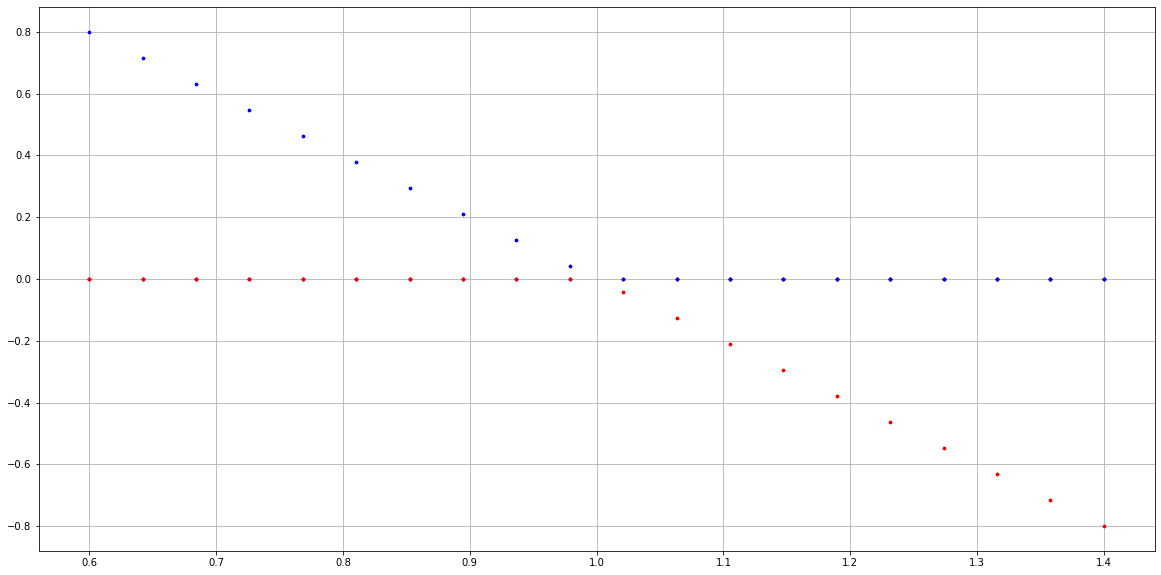

In [32]:
# Bifurcacion Transcritica
dt = 0.2
pars={'R':1.0,'K':2,'P':0.5}
tmax = 500
xini = np.linspace(-0.2,0.2,5)
pvals = np.linspace(0.6,1.4,20)
bifurcation_diag(consumer, pars, xini, tmax, dt, 'P', pvals, xrange=[-1,1]);

 # Ecuacion Logistica con OutBreak
    


Se agrega a la ecuacion logistica un termino con la funcion del predador

$\dot{x} = Rx(1-x/K)-\frac{x^2}{1+x^2}$

En este caso no basta una cuadratica para calcular los puntos fijos. Pero $x=0$ sigue siendo un punto fijo repulsor. Y bajo ciertas condiciones tenemos dos puntos fijos atractores separados por un repulsor.


In [35]:
def logistic_outbreak(t, x, R,K):
    return [
         R*x*(1-x/K)-x*x/(1+x*x)
    ]

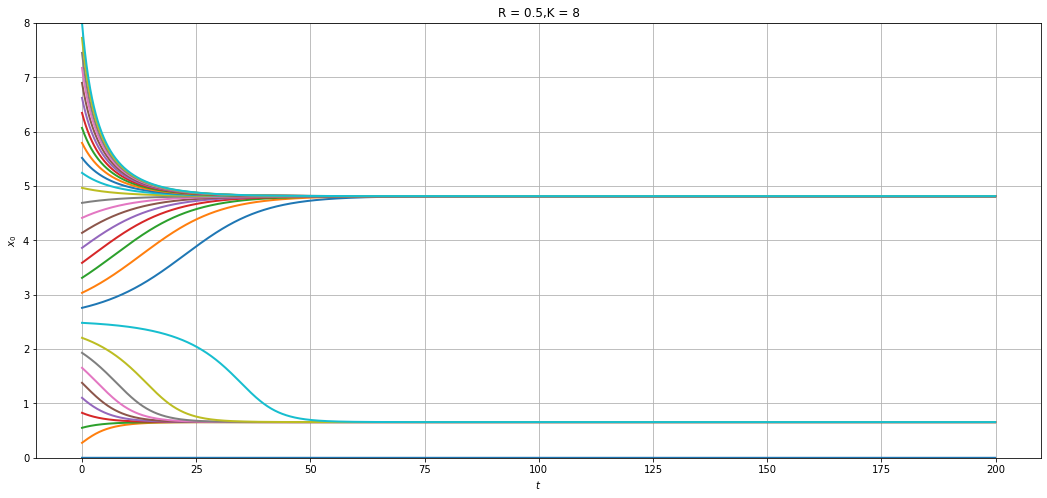

In [37]:
# multiples trayectorias
xini_array = np.linspace(0,8,30)
dt = 0.1
tmax = 200
pars={'R':0.5,'K':8}
solve_plot1D_multiple(logistic_outbreak,pars,xini_array,tmax,dt,xrange=[0,8])

In [39]:
def solve_dual_logistic_outbreak(R,K,xini,tmax):
    dt = 0.1
    par=({'R':R,'K':K})
    return solve_plot1D_dual(logistic_outbreak,par,[xini],tmax,dt,xrange=[0,8])

iplot5 = interactive(solve_dual_logistic_outbreak,
                    R=(0,1.0,0.01),
                    K=(0,10.0,0.01), 
                    xini=(0,4,0.01),
                    tmax=(1,100,1))

iplot5

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.01), FloatSlider(value=5.0, desc…

## Diagrama de bifurcaciones

En este caso tenemos dos bifurcaciones SN que ocurren en direcciones opuestas 

0.46
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
0.4658333333333334
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Require

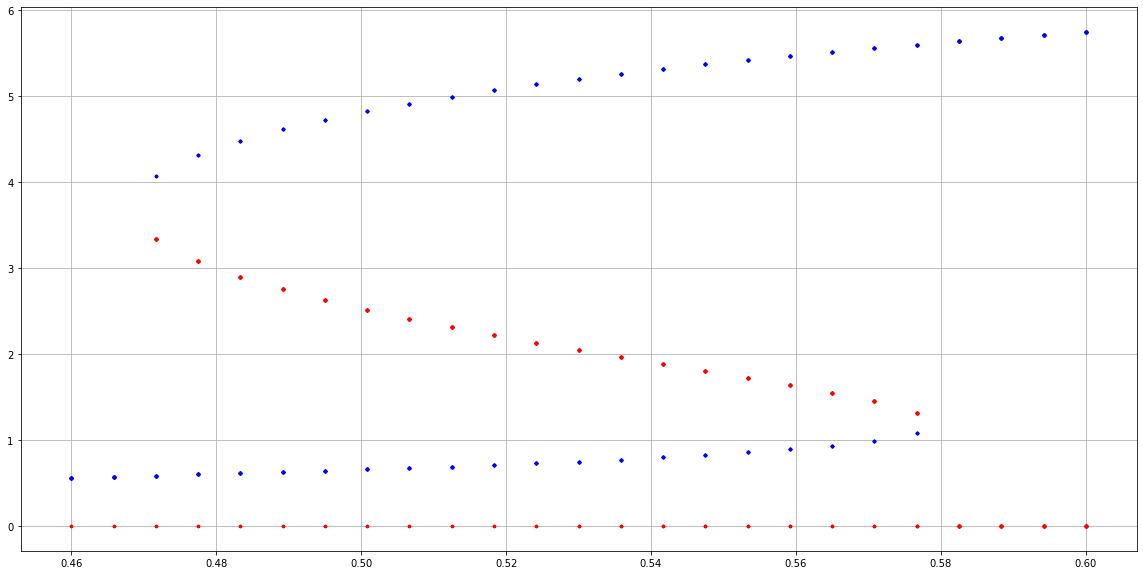

In [40]:
dt = 0.1
pars={'R':0.5,'K':8}
tmax = 500
xini = np.linspace(0,4,17)
rvals = np.linspace(0.46,0.6,25)
bifurcation_diag(logistic_outbreak, pars, xini, tmax, dt, 'R', rvals, xrange=[0,8]);

## un poco mas avanzado

Los tres puntos fijos (dos atractores y un repulsor) salen de resolver la siguiente ecuacion (se puede obtener a partir de igualar a cero la ecuacion diferencial)

$x^3-Kx^2+x(1+K/R)-K=0$

Que se puede resolver numericamente con np.roots pasando los coeficientes del polinomio, para un valor dado de K y R obtenemos las tres raices del polinomio. Si obtenemos tres raices reales esos son los tres puntos fijos

In [43]:
R = 0.5
K = 8
np.roots([1,-K,1+K/R,-K])

array([4.8136065 , 2.52931658, 0.65707692])

Si en cambio alguna de las raices es compleja con parte imaginaria diferente de cero entonces no corresponde a un punto fijo. En este caso tenemos un solo punto fijo

In [44]:
R = 0.4
K = 8
np.roots([1,-K,1+K/R,-K])

array([3.77225576+1.82582815j, 3.77225576-1.82582815j,
       0.45548847+0.j        ])